In [79]:
import pandas as pd
import scipy.stats as stats #prueba t student
from scipy.stats import f_oneway #anova
from scipy.stats import spearmanr #prueba spearman
from scipy.stats import shapiro #para pruebas de normalidad
import seaborn as sns #matriz correlaciones
from scipy.stats import chi2_contingency #prueba chicuadrado
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data_frame = pd.read_csv("C:/Users/Bruno_2/Desktop/Machine learning/estudialcohol.csv", delimiter=",")


transformacion de datos

In [80]:
columnas_no_numericas = data_frame.select_dtypes(exclude=['number'])
columnas_no_numericas = columnas_no_numericas.drop('nivelalco', axis=1) 
from sklearn.preprocessing import LabelEncoder;      df_convertido_Cate=pd.DataFrame();   label_encoder = LabelEncoder()

for columna in columnas_no_numericas:
    data_frame[columna] = label_encoder.fit_transform(columnas_no_numericas[columna])

mapeo = {
    "MUYBAJO": 0,
    "BAJO": 1,
    "NORMAL": 2,
    "ALTO": 3,
    "MUYALTO": 4
}
data_frame['nivelalco'] = data_frame['nivelalco'].map(mapeo)

In [81]:
if data_frame.isna().any().any():
    print("El DataFrame tiene valores nulos en al menos una columna.")
else:
    print("El DataFrame no tiene valores nulos en ninguna columna.")


El DataFrame no tiene valores nulos en ninguna columna.


ANALISIS DESCRIPTIVO

Graficos de barra para variables categoricas

In [84]:
#barchart por variables categoricas
dataframe_categorico = data_frame.select_dtypes(exclude=['number'])
columnas_categoricas = dataframe_categorico.columns
graficos_por_pagina = 6

for i, columna in enumerate(columnas_categoricas):
    if i % graficos_por_pagina == 0:
        if i > 0:
            plt.show()
        plt.figure(figsize=(16, 12),dpi=100)  # Tamaño de la página
    counts = dataframe_categorico[columna].value_counts()
    plt.subplot(2, 3, i % graficos_por_pagina + 1)  # 2 filas, 3 columnas
    counts.plot(kind='bar', color='skyblue')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.title(f'Gráfico de barras para {columna}')
plt.show()

Boxplot para variables numericas

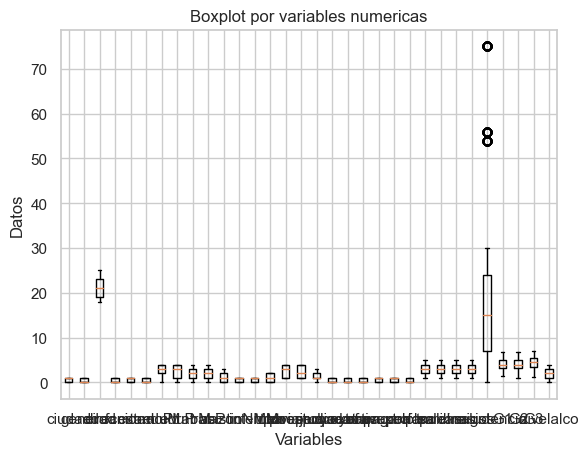

In [83]:

#boxplot por variables numericas 
dataframe_numerico=data_frame.select_dtypes(include=['number'])
fig, ax = plt.subplots()
ax.boxplot([dataframe_numerico[i] for i in dataframe_numerico.columns] )
ax.set_xticklabels(dataframe_numerico.columns)
ax.set_xlabel('Variables')
ax.set_ylabel('Datos')
ax.set_title('Boxplot por variables numericas', loc='center')
plt.show()

In [52]:
#ELIMINACION DE OUTLIERS PARA INASISTENCIA
Q1 = data_frame["inasistencia"].quantile(0.25)
Q3 = data_frame["inasistencia"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers en la columna actual
data_frame = data_frame[(data_frame["inasistencia"] >= limite_inferior) & (data_frame["inasistencia"] <= limite_superior)]

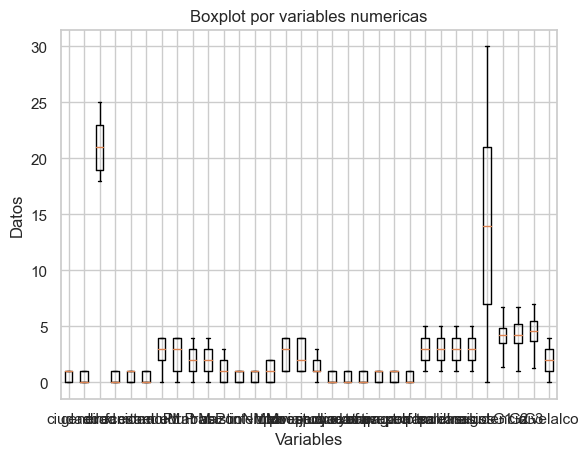

In [53]:

#boxplot por variables numericas 
dataframe_numerico=data_frame.select_dtypes(include=['number'])
fig, ax = plt.subplots()
ax.boxplot([dataframe_numerico[i] for i in dataframe_numerico.columns] )
ax.set_xticklabels(dataframe_numerico.columns)
ax.set_xlabel('Variables')
ax.set_ylabel('Datos')
ax.set_title('Boxplot por variables numericas', loc='center')
plt.show()

HIPOTESIS 1

----------------------------------------------------------------------------------------------------
hipotesis 1,  rendimiento academico relacionado con el consumo de alcohol


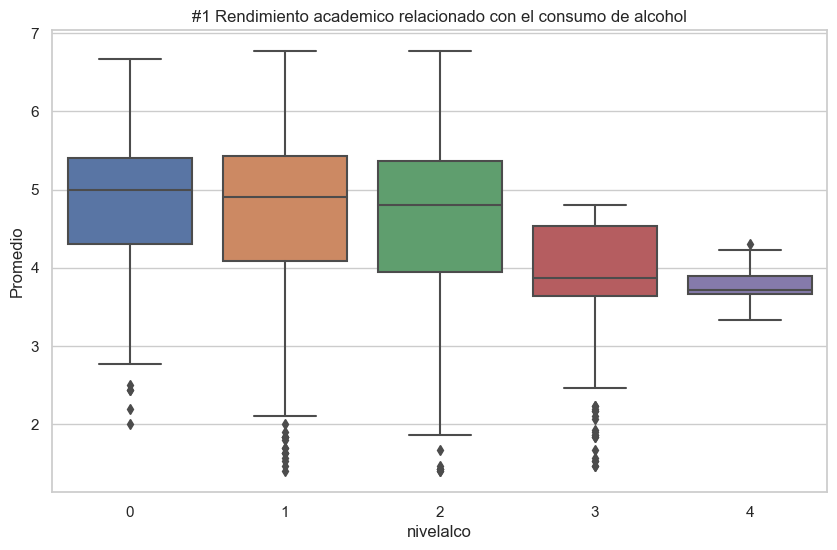

Estadístico F: 98.42326704509026
Valor p: 2.5466184028143964e-78
Hay evidencia de diferencias significativas entre los grupos.


In [54]:
# 1. El rendimiento académico está relacionado con el consumo de alcohol.
print("-"*100)
print("hipotesis 1,  rendimiento academico relacionado con el consumo de alcohol")

data_frame['Promedio'] = data_frame[['G1', 'G2', 'G3']].mean(axis=1)
# fig, ax = plt.subplots()

plt.figure(figsize=(10, 6))
sns.boxplot(x="nivelalco", y="Promedio", data=data_frame)
plt.xlabel('nivelalco')
plt.ylabel('Promedio')
plt.title(f'#1 Rendimiento academico relacionado con el consumo de alcohol')
plt.show()

#evaluacion anova
grupos = [data_frame[data_frame['nivelalco'] == categoria]['Promedio'] for categoria in data_frame['nivelalco'].unique()]
resultado_anova = f_oneway(*grupos)
print("Estadístico F:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)


if resultado_anova.pvalue < 0.05:  # Usualmente se usa un nivel de significancia del 0.05
    print("Hay evidencia de diferencias significativas entre los grupos.")
else:
    print("No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.")


HIPOTESIS 2

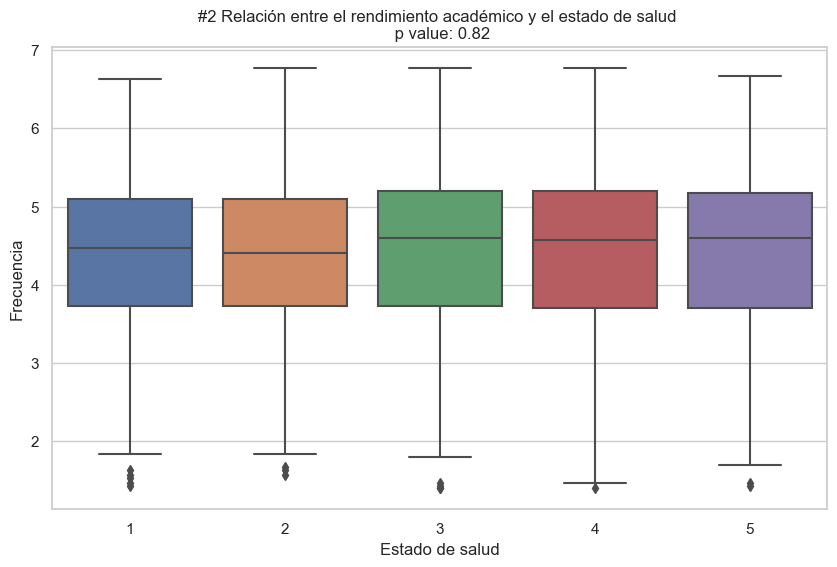

No hay evidencia de una relación significativa entre las dos variables categóricas. 0.8246178816106092


In [55]:
# 2. El rendimiento académico está relacionado con el estado de salud de los estudiantes.


grupos = [data_frame[data_frame['salud'] == categoria]['Promedio'] for categoria in data_frame['salud'].unique()]
# Realizar un ANOVA
resultado_anova = f_oneway(*grupos)

#grafico de barras para las 2 variables
plt.figure(figsize=(10, 6))
sns.boxplot(x="salud", y="Promedio", data=data_frame)
plt.xlabel('Estado de salud')
plt.ylabel('Frecuencia')
plt.title(f'#2 Relación entre el rendimiento académico y el estado de salud \n p value: {format(resultado_anova.pvalue, ".2f")}')
plt.show()

if resultado_anova.pvalue < 0.05: 
    print("Hay una relación significativa entre las dos variables categóricas.")
else:
    print("No hay evidencia de una relación significativa entre las dos variables categóricas.", resultado_anova.pvalue )

HIPOTESIS 3

hipotesis 3,  rendimiento academico relacionado con la estructura familiar


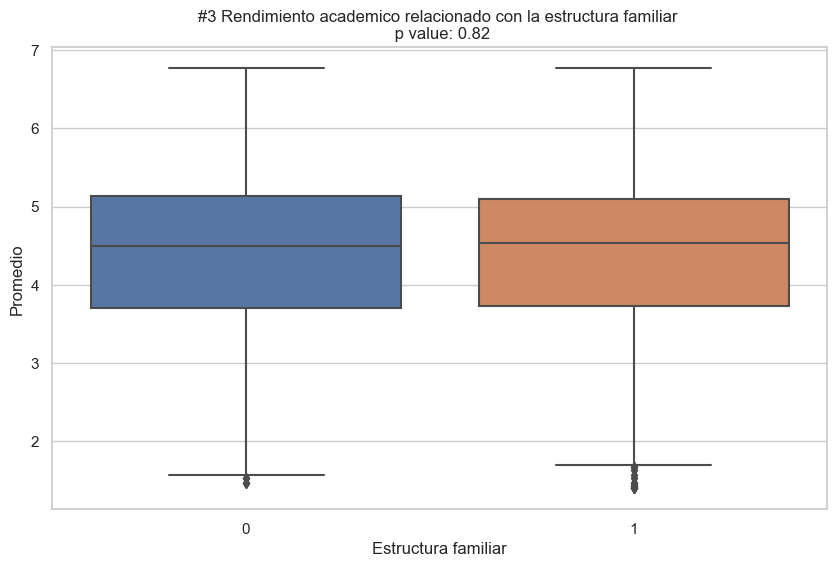

Estadístico F: 0.025756460942803774
Valor p: 0.8725084458812709
No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.
----------------------------------------------------------------------------------------------------


In [56]:
print("hipotesis 3,  rendimiento academico relacionado con la estructura familiar")
plt.figure(figsize=(10, 6))
sns.boxplot(x="famtam", y="Promedio", data=data_frame)
plt.xlabel('Estructura familiar')
plt.ylabel('Promedio')
plt.title(f'#3 Rendimiento academico relacionado con la estructura familiar \n p value: {format(resultado_anova.pvalue, ".2f")}')
plt.show()

#evaluacion anova
grupos = [data_frame[data_frame['famtam'] == categoria]['Promedio'] for categoria in data_frame['famtam'].unique()]
resultado_anova = f_oneway(*grupos)
print("Estadístico F:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)


if resultado_anova.pvalue < 0.05:  # Usualmente se usa un nivel de significancia del 0.05
    print("Hay evidencia de diferencias significativas entre los grupos.")
else:
    print("No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.")

"-------------------------------------------------------------------------------------------------------"
print("-"*100)
# 4. El consumo d

HIPOTESIS 4

In [91]:
print("el consumo de alcohol está relacionado con el estado de salud de los estudiantes.")
tabla_contingencia = pd.crosstab(data_frame['nivelalco'], data_frame['salud'])
chi2, p, _, _ = stats.chi2_contingency(tabla_contingencia)
alpha = 0.05
print(p)
if p < alpha:
    print("Hay una relación significativa entre las dos variables categóricas.")
else:
    print("No hay evidencia de una relación significativa entre las dos variables categóricas.")

import pandas as pd
from scipy import stats


resultado = stats.kruskal(*[data_frame[data_frame['salud'] == i]['nivelalco'] for i in range(0, 5)])

alpha = 0.05

print("Valor p:", resultado.pvalue)

if resultado.pvalue < alpha:
    print("Hay diferencias significativas entre los grupos definidos por la variable categórica en la variable ordinal.")
else:
    print("No hay evidencia de diferencias significativas entre los grupos definidos por la variable categórica en la variable ordinal.")





#grafico de barras para las 2 variables
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data_frame, x='nivelalco', hue='salud')
plt.xlabel('Nivel de Alcohol')
plt.ylabel('Frecuencia')
plt.title(f'#4 Relación entre el nivel de alcohol y el estado de salud \n p value: {format(p, ".2f")}')
plt.legend(title='Estado de salud ', loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="nivelalco", y="salud", data=data_frame)
plt.xlabel('Nivel de Alcohol')
plt.ylabel('salud')
plt.title(f'#4 Relación entre el nivel de alcohol y el estado de salud \n p value: {format(p, ".2f")}')
plt.show()

el consumo de alcohol está relacionado con el estado de salud de los estudiantes.


ValueError: No data; `observed` has size 0.

HIPOTESIS 5

hipotesis 5,  consumo de alcohol relacionado con la estructura familiar
Estadístico Chi-cuadrado: 2.3253986385132177
Valor p: 0.6761487431310149
No hay evidencia de una relación significativa entre las dos variables categóricas.


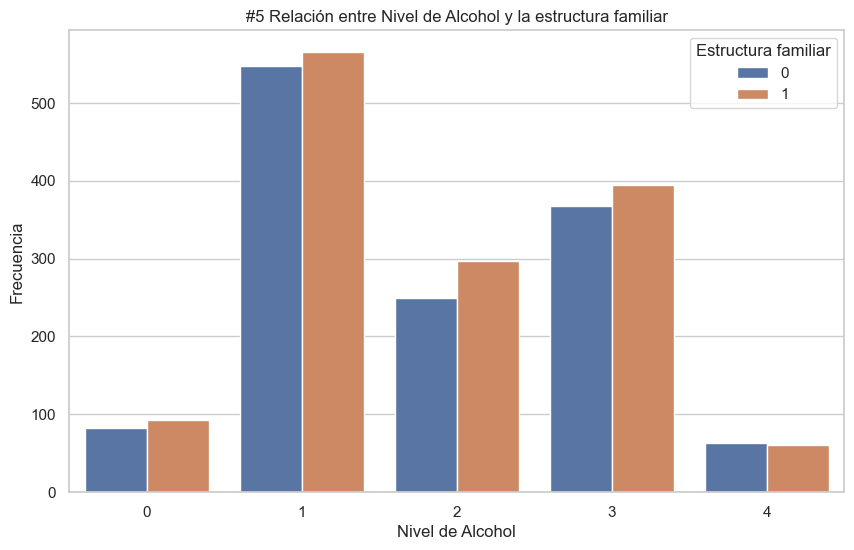

In [58]:
print("hipotesis 5,  consumo de alcohol relacionado con la estructura familiar")

tabla_contingencia = pd.crosstab(data_frame['nivelalco'], data_frame['famtam'])
chi2, p, _, _ = chi2_contingency(tabla_contingencia)
print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
alpha = 0.05
if p < alpha:
    print("Hay una relación significativa entre las dos variables categóricas.")
else:
    print("No hay evidencia de una relación significativa entre las dos variables categóricas.")

#grafico de barras para las 2 variables
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data_frame, x='nivelalco', hue='famtam')
plt.xlabel('Nivel de Alcohol')
plt.ylabel('Frecuencia')
plt.title('#5 Relación entre Nivel de Alcohol y la estructura familiar')
plt.legend(title='Estructura familiar', loc='upper right')
plt.show()

HIPOTESIS 6

----------------------------------------------------------------------------------------------------
hipotesis 6, El consumo de alcohol está relacionado con el tiempo que los estudiantes pasan con amigos
No hay evidencia de una relación significativa entre las dos variables categóricas.


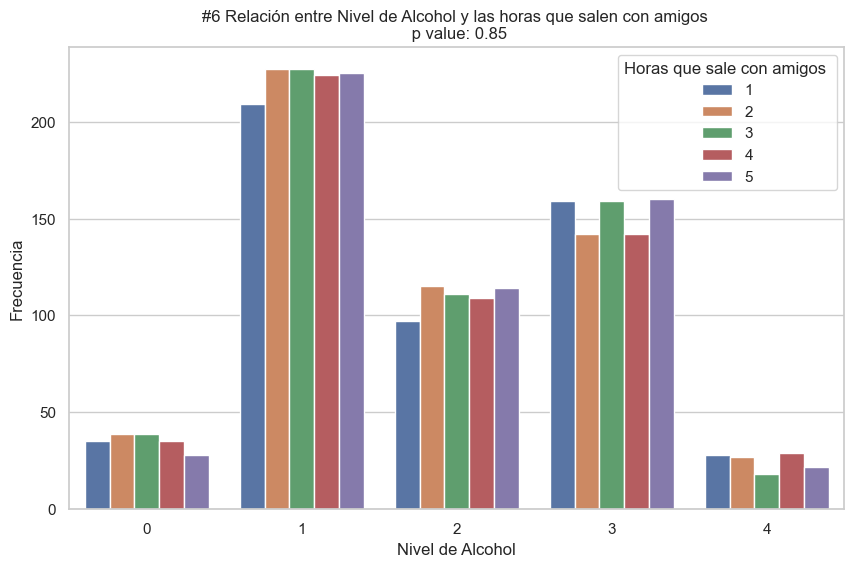

In [59]:
#6. El consumo de alcohol está relacionado con el tiempo que los estudiantes pasan con amigos.
print("-"*100)
print("hipotesis 6, El consumo de alcohol está relacionado con el tiempo que los estudiantes pasan con amigos")

tabla_contingencia = pd.crosstab(data_frame['nivelalco'], data_frame['saleamigos'])
chi2, p, _, _ = stats.chi2_contingency(tabla_contingencia)
alpha = 0.05
if p < alpha:
    print("Hay una relación significativa entre las dos variables categóricas.")
else:
    print("No hay evidencia de una relación significativa entre las dos variables categóricas.")

#grafico de barras para las 2 variables
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data_frame, x='nivelalco', hue='saleamigos')
plt.xlabel('Nivel de Alcohol')
plt.ylabel('Frecuencia')
plt.title(f'#6 Relación entre Nivel de Alcohol y las horas que salen con amigos \n p value: {format(p, ".2f")}')
plt.legend(title='Horas que sale con amigos ', loc='upper right')
plt.show()
    

HIPOTESIS 7

#7. El estado de salud de los estudiantes está relacionado con la estructura familiar.
No hay evidencia de una relación significativa entre las dos variables categóricas.


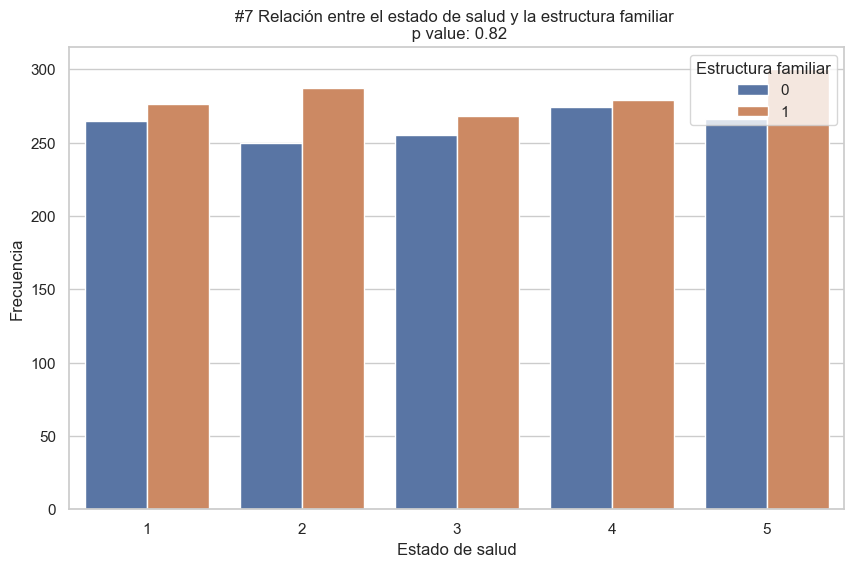

In [60]:
print("#7. El estado de salud de los estudiantes está relacionado con la estructura familiar.")
tabla_contingencia = pd.crosstab(data_frame['salud'], data_frame['famtam'])
chi2, p, _, _ = stats.chi2_contingency(tabla_contingencia)
alpha = 0.05
if p < alpha:
    print("Hay una relación significativa entre las dos variables categóricas.")
else:
    print("No hay evidencia de una relación significativa entre las dos variables categóricas.")

#grafico de barras para las 2 variables
plt.figure(figsize=(10, 6))
sns.countplot(data=data_frame, x='salud', hue='famtam')
plt.xlabel('Estado de salud')
plt.ylabel('Frecuencia')
plt.title(f'#7 Relación entre el estado de salud y la estructura familiar \n p value: {format(p, ".2f")}')
plt.legend(title='Estructura familiar', loc='upper right')
plt.show()

HIPOTESIS 8

#8. El estado de salud de los estudiantes está relacionado con el tiempo que pasan con amigos.
No hay evidencia de una relación significativa entre las dos variables categóricas.


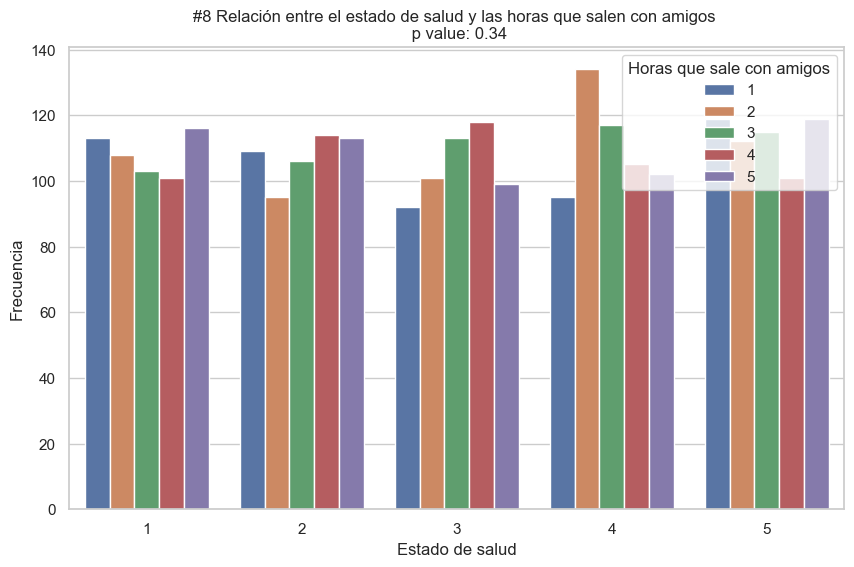

In [61]:
print("#8. El estado de salud de los estudiantes está relacionado con el tiempo que pasan con amigos.")
tabla_contingencia = pd.crosstab(data_frame['salud'], data_frame['saleamigos'])
chi2, p, _, _ = stats.chi2_contingency(tabla_contingencia)
alpha = 0.05
if p < alpha:
    print("Hay una relación significativa entre las dos variables categóricas.")
else:
    print("No hay evidencia de una relación significativa entre las dos variables categóricas.")

#grafico de barras para las 2 variables
plt.figure(figsize=(10, 6))
sns.countplot(data=data_frame, x='salud', hue='saleamigos')
plt.xlabel('Estado de salud')
plt.ylabel('Frecuencia')
plt.title(f'#8 Relación entre el estado de salud y las horas que salen con amigos \n p value: {format(p, ".2f")}')
plt.legend(title='Horas que sale con amigos', loc='upper right')
plt.show()

HIPOTESIS 9

#9. La estructura familiar de los estudiantes está relacionada con el tiempo que pasan con amigos.
No hay evidencia de una relación significativa entre las dos variables categóricas.


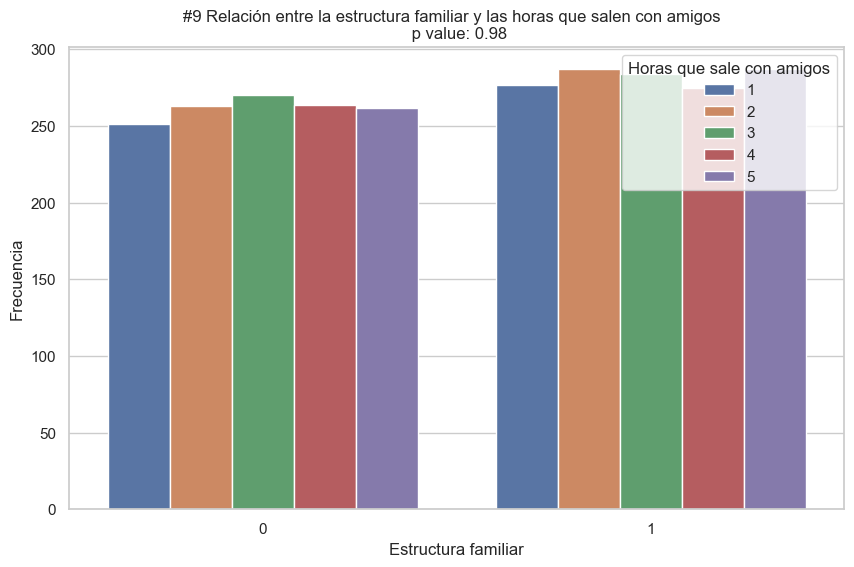

In [62]:
print("#9. La estructura familiar de los estudiantes está relacionada con el tiempo que pasan con amigos.")
tabla_contingencia = pd.crosstab(data_frame['famtam'], data_frame['saleamigos'])
chi2, p, _, _ = stats.chi2_contingency(tabla_contingencia)
alpha = 0.05
if p < alpha:
    print("Hay una relación significativa entre las dos variables categóricas.")
else:
    print("No hay evidencia de una relación significativa entre las dos variables categóricas.")

#grafico de barras para las 2 variables
plt.figure(figsize=(10, 6))
sns.countplot(data=data_frame, x='famtam', hue='saleamigos')
plt.xlabel('Estructura familiar')
plt.ylabel('Frecuencia')
plt.title(f'#9 Relación entre la estructura familiar y las horas que salen con amigos  \n p value: {format(p, ".2f")}')
plt.legend(title='Horas que sale con amigos', loc='upper right')
plt.show()

HIPOTESIS 10

#10. La estructura familiar de los estudiantes está relacionada con la inasistencia a clases.


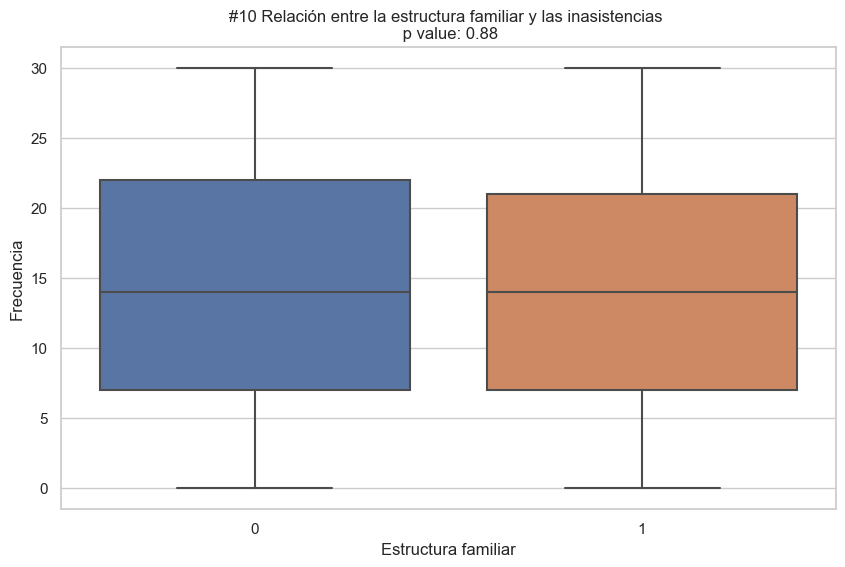

No hay evidencia de una relación significativa entre las dos variables categóricas.


In [63]:
print("#10. La estructura familiar de los estudiantes está relacionada con la inasistencia a clases.")
# Dividir los datos en grupos basados en la variable categórica 'famtam'
grupos = [data_frame[data_frame['famtam'] == categoria]['inasistencia'] for categoria in data_frame['famtam'].unique()]
# Realizar un ANOVA
resultado_anova = f_oneway(*grupos)

#grafico de barras para las 2 variables
plt.figure(figsize=(10, 6))
sns.boxplot(x="famtam", y="inasistencia", data=data_frame)
plt.xlabel('Estructura familiar')
plt.ylabel('Frecuencia')
plt.title(f'#10 Relación entre la estructura familiar y las inasistencias \n p value: {format(resultado_anova.pvalue, ".2f")}')
plt.show()

if resultado_anova.pvalue < 0.05: 
    print("Hay una relación significativa entre las dos variables categóricas.")
else:
    print("No hay evidencia de una relación significativa entre las dos variables categóricas.")

HIPOTESIS 11

11. El tiempo que los estudiantes pasan con amigos está relacionado con la inasistencia a clases.


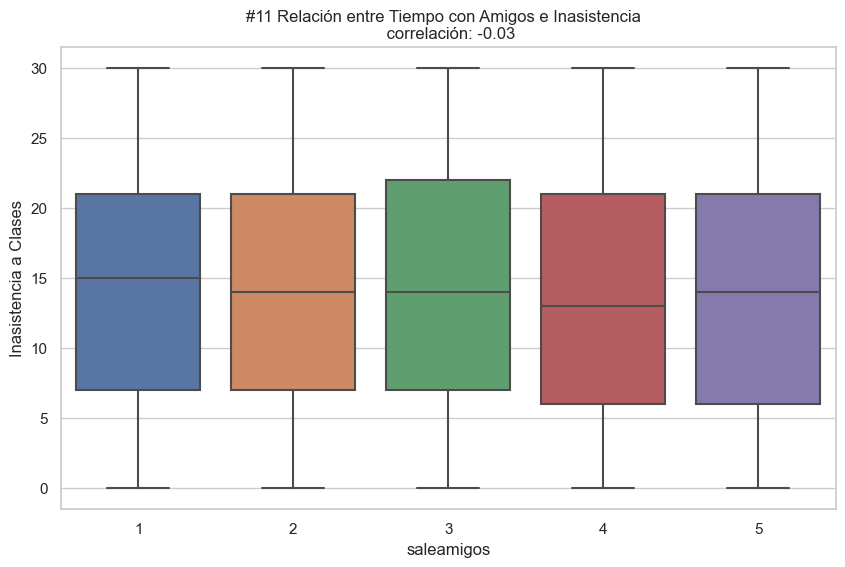

EN LA HIPÓTESIS 11 (Spearman) No hay una diferencia significativa. Valor de p: 0.13969859790044165


In [64]:
print("11. El tiempo que los estudiantes pasan con amigos está relacionado con la inasistencia a clases.")
#RECHAZO
correlation_spearman11, p_value_spearman11 = spearmanr(data_frame['saleamigos'], data_frame['inasistencia'])

#grafico de barras para las 2 variables
plt.figure(figsize=(10, 6))
sns.boxplot(x="saleamigos", y="inasistencia", data=data_frame)
plt.xlabel('saleamigos')
plt.ylabel('Inasistencia a Clases')
plt.title(f'#11 Relación entre Tiempo con Amigos e Inasistencia  \n correlación: {format(correlation_spearman11, ".2f")}')
plt.show()


if p_value_spearman11 < 0.05:
    print("EN LA HIPÓTESIS 11 (Spearman) Hay una diferencia significativa. Valor de p:", p_value_spearman11)
else:
    print("EN LA HIPÓTESIS 11 (Spearman) No hay una diferencia significativa. Valor de p:", p_value_spearman11)

HIPOTESIS 12

12. El rendimiento académico está relacionado con la inasistencia a clases.


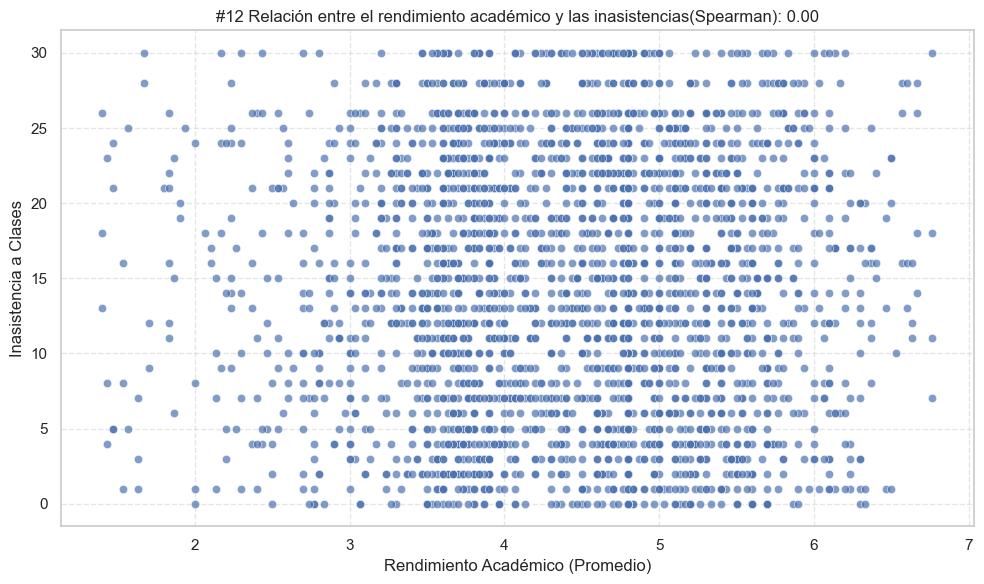

EN LA HIPÓTESIS 12 (Spearman) No hay una diferencia significativa. Valor de p: 0.8345570650194645


In [65]:
print("12. El rendimiento académico está relacionado con la inasistencia a clases.")
correlation_spearman12, p_value_spearman12 = spearmanr(data_frame['Promedio'], data_frame['inasistencia'])

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Promedio', y='inasistencia', data=data_frame, alpha=0.7)
plt.title(f"#12 Relación entre el rendimiento académico y las inasistencias(Spearman): {correlation_spearman12:.2f}")
plt.xlabel('Rendimiento Académico (Promedio)')
plt.ylabel('Inasistencia a Clases')
plt.grid(True, linestyle='--', alpha=0.5)

# Agregar líneas de separación significativa si corresponde
if p_value_spearman12 < 0.05:
    plt.axhline(y=data_frame['inasistencia'].mean(), color='red', linestyle='--', label='Media de Inasistencia')
    plt.axvline(x=data_frame['Promedio'].mean(), color='blue', linestyle='--', label='Media de Rendimiento Académico')
    plt.legend()

plt.tight_layout()
plt.show()


if p_value_spearman12 < 0.05:
    print("EN LA HIPÓTESIS 12 (Spearman) Hay una diferencia significativa. Valor de p:", p_value_spearman12)
else:
    print("EN LA HIPÓTESIS 12 (Spearman) No hay una diferencia significativa. Valor de p:", p_value_spearman12)

HIPOTESIS 13

13. El rendimiento académico está relacionado con el tiempo que los estudiantes pasan con amigos.
EN LA HIPÓTESIS 13 (Spearman) No hay una diferencia significativa. Valor de p: 0.7153556866346282


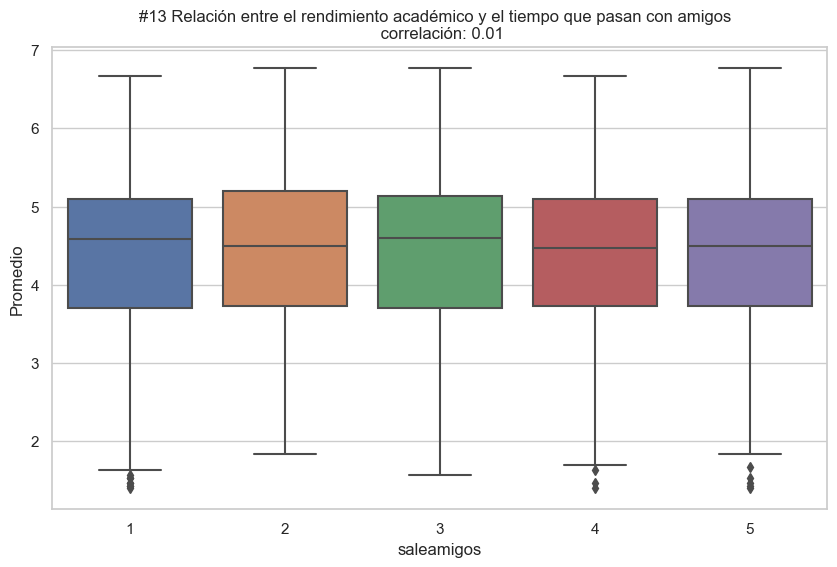

In [66]:

print("13. El rendimiento académico está relacionado con el tiempo que los estudiantes pasan con amigos.")
correlation_spearman13, p_value_spearman13 = spearmanr(data_frame['Promedio'], data_frame['saleamigos'])
if p_value_spearman13 < 0.05:
    print("EN LA HIPÓTESIS 13 (Spearman) Hay una diferencia significativa. Valor de p:", p_value_spearman13)
else:
    print("EN LA HIPÓTESIS 13 (Spearman) No hay una diferencia significativa. Valor de p:", p_value_spearman13)

#grafico de barras para las 2 variables
plt.figure(figsize=(10, 6))
sns.boxplot(x="saleamigos", y="Promedio", data=data_frame)
plt.xlabel('saleamigos')
plt.ylabel('Promedio')
plt.title(f'#13 Relación entre el rendimiento académico y el tiempo que pasan con amigos  \n correlación: {format(correlation_spearman13, ".2f")}')
plt.show()


HIPOTESIS 14

14. El consumo de alcohol está relacionado con la inasistencia a clases.


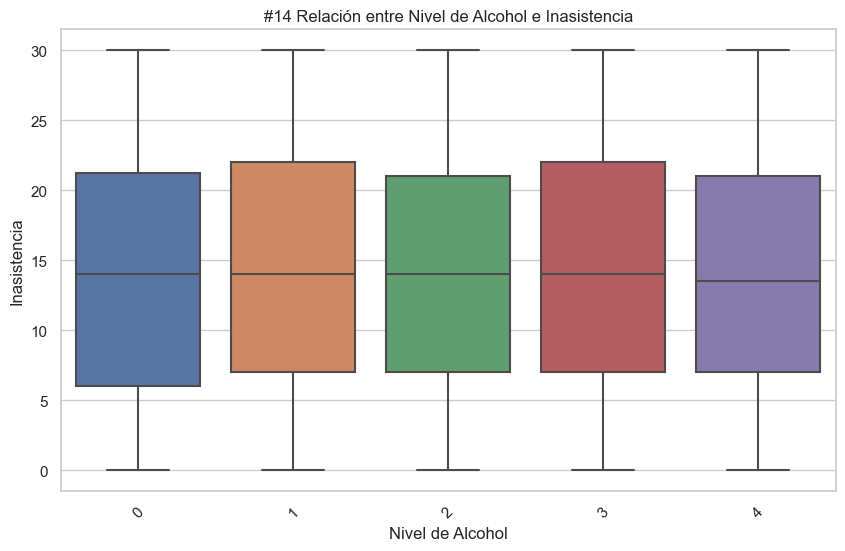

Estadístico F: 0.46623085165620476
Valor p: 0.7605768003378858
Hipótesis 14: No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.


In [67]:
print("14. El consumo de alcohol está relacionado con la inasistencia a clases.")

grupos14 = [data_frame[data_frame['nivelalco'] == categoria]['inasistencia'] for categoria in data_frame['nivelalco'].unique()]
resultado_anova14 = f_oneway(*grupos14)

# Crear un gráfico de caja para visualizar la relación entre nivel de alcohol e inasistencia
plt.figure(figsize=(10, 6))
sns.boxplot(x='nivelalco', y='inasistencia', data=data_frame)
plt.xlabel('Nivel de Alcohol')
plt.ylabel('Inasistencia')
plt.title('#14 Relación entre Nivel de Alcohol e Inasistencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()

print("Estadístico F:", resultado_anova14.statistic)
print("Valor p:", resultado_anova14.pvalue)

if resultado_anova14.pvalue < 0.05: 
    print("Hipótesis 14: Hay evidencia de diferencias significativas entre los grupos.")
else:
    print("Hipótesis 14: No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.")

CREACION DE HIPOTESIS

HIPOTESIS 1

1. El consumo de alcohol está relacionado con el numero de asignaturas reprobadas
Estadístico F: 0.8008558108764676
Valor p: 0.5244927423033645
Hipótesis nueva 1: No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.


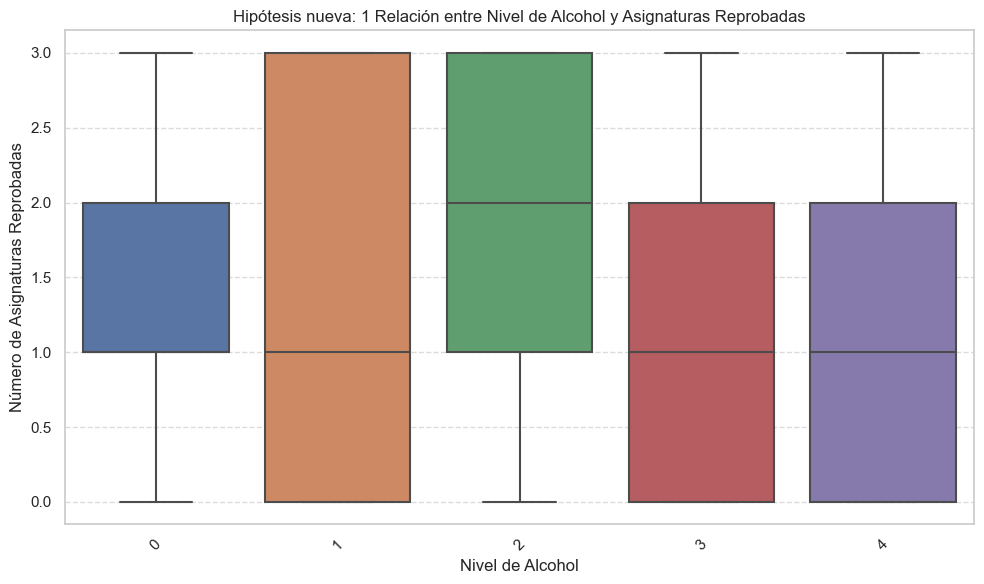

------------------------------------------------------------


In [68]:
print("1. El consumo de alcohol está relacionado con el numero de asignaturas reprobadas")

# Dividir los datos en grupos basados en la variable categórica 'nivelalco'
grupos1 = [data_frame[data_frame['nivelalco'] == categoria]['areprobadas'] for categoria in data_frame['nivelalco'].unique()]

# Realizar un ANOVA
resultado_anova1 = f_oneway(*grupos1)

print("Estadístico F:", resultado_anova1.statistic)
print("Valor p:", resultado_anova1.pvalue)

if resultado_anova1.pvalue < 0.05: 
    print("Hipótesis nueva 1: Hay evidencia de diferencias significativas entre los grupos.")
else:
    print("Hipótesis nueva 1: No hay evidencia suficiente para afirmar diferencias significativas entre los grupos.")

# Crear un gráfico de barras apiladas para visualizar la relación
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_frame, x='nivelalco', y='areprobadas')
plt.xlabel('Nivel de Alcohol')
plt.ylabel('Número de Asignaturas Reprobadas')
plt.title('Hipótesis nueva: 1 Relación entre Nivel de Alcohol y Asignaturas Reprobadas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("-"*60)

HIPOTESIS 2

2. El consumo de alcohol está relacionado con el apoyofamiliar
EN LA HIPÓTESIS nueva 2 (Chi-cuadrado) No hay una diferencia significativa. Valor de p: 0.8380717061614602


<Figure size 1000x600 with 0 Axes>

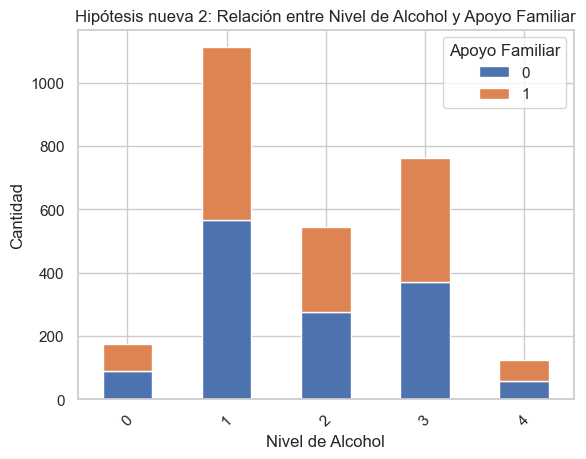

------------------------------------------------------------


In [69]:
print("2. El consumo de alcohol está relacionado con el apoyofamiliar")
tabla_contingencia4 = pd.crosstab(data_frame['nivelalco'], data_frame['apoyofam'])
chi_4, p_value_chi_4, _, _ = chi2_contingency(tabla_contingencia4)

if p_value_chi_4 < 0.05:
    print("EN LA HIPÓTESIS nueva 2 (Chi-cuadrado) Hay una diferencia significativa. Valor de p:", p_value_chi_4)
else:
    print("EN LA HIPÓTESIS nueva 2 (Chi-cuadrado) No hay una diferencia significativa. Valor de p:", p_value_chi_4)

plt.figure(figsize=(10, 6))
tabla_contingencia4.plot(kind='bar', stacked=True)
plt.xlabel('Nivel de Alcohol')
plt.ylabel('Cantidad')
plt.title('Hipótesis nueva 2: Relación entre Nivel de Alcohol y Apoyo Familiar')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.legend(title='Apoyo Familiar', loc='upper right')
plt.show()

print("-"*60)

HIPOTESIS 3

3. El consumo de alcohol se relaciona con la razon
Hay una relación significativa entre las dos variables categóricas.


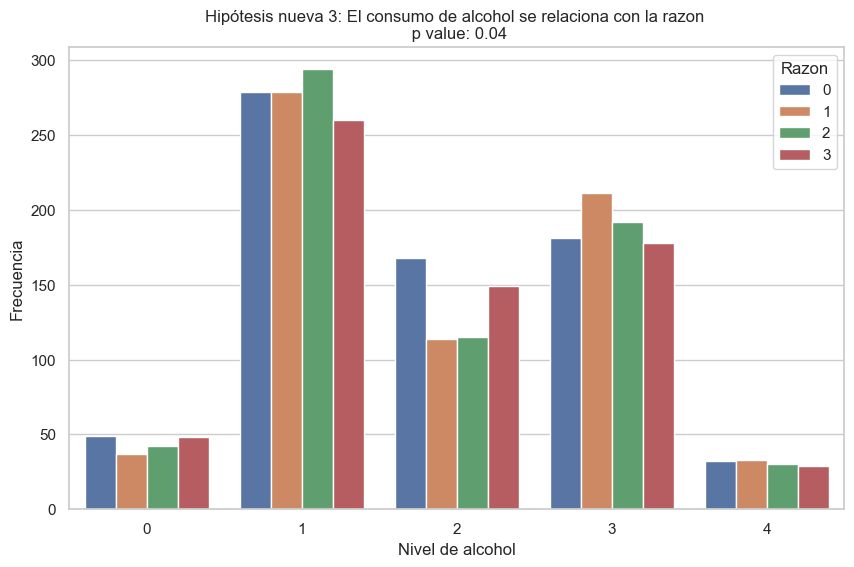

In [70]:
print("3. El consumo de alcohol se relaciona con la razon")

tabla_contingencia = pd.crosstab(data_frame['nivelalco'], data_frame['razon'])
chi2, p, _, _ = stats.chi2_contingency(tabla_contingencia)
alpha = 0.05
if p < alpha:
    print("Hay una relación significativa entre las dos variables categóricas.")
else:
    print("No hay evidencia de una relación significativa entre las dos variables categóricas.")

#grafico de barras para las 2 variables
plt.figure(figsize=(10, 6))
sns.countplot(data=data_frame, x='nivelalco', hue='razon')
plt.xlabel('Nivel de alcohol')
plt.ylabel('Frecuencia')
plt.title(f'Hipótesis nueva 3: El consumo de alcohol se relaciona con la razon \n p value: {format(p, ".2f")}')
plt.legend(title='Razon', loc='upper right')
plt.show()


HIPOTESIS 4

4. El consumo de alcohol está relacionado con el pololeo
Estadístico Chi-cuadrado: 10.836285244250899
Valor p: 0.0284668832811228
Hay una relación significativa entre las dos variables categóricas.


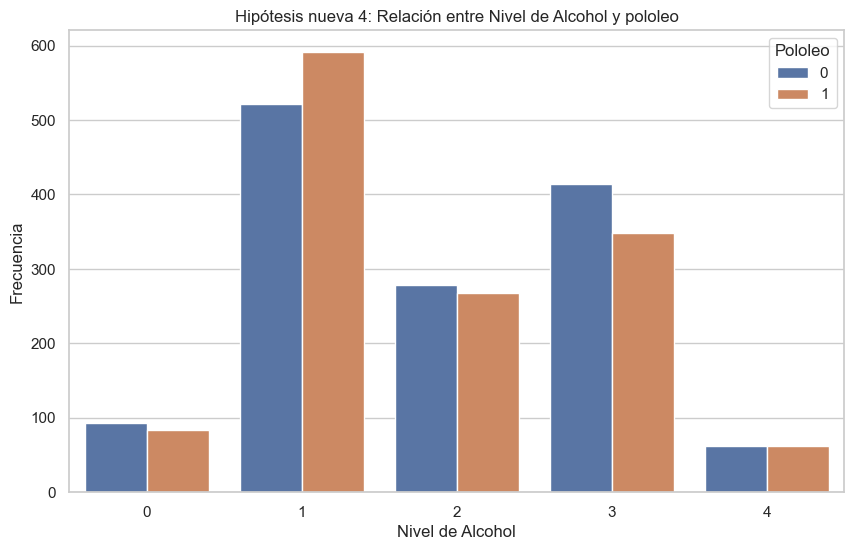

In [71]:
print("4. El consumo de alcohol está relacionado con el pololeo")
tabla_contingencia = pd.crosstab(data_frame['nivelalco'], data_frame['pololea'])
chi2, p, _, _ = chi2_contingency(tabla_contingencia)
print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
alpha = 0.05
if p < alpha:
    print("Hay una relación significativa entre las dos variables categóricas.")
else:
    print("No hay evidencia de una relación significativa entre las dos variables categóricas.") 

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data_frame, x='nivelalco', hue='pololea')
plt.xlabel('Nivel de Alcohol')
plt.ylabel('Frecuencia')
plt.title('Hipótesis nueva 4: Relación entre Nivel de Alcohol y pololeo')
plt.legend(title='Pololeo', loc='upper right')
plt.show()

HIPOTESIS 5

5: Relación entre Nivel de Alcohol y la ciudad de residencia
Estadístico Chi-cuadrado: 4.6210789475942216
Valor p: 0.32843106375309356
No hay evidencia de una relación significativa entre las dos variables categóricas.


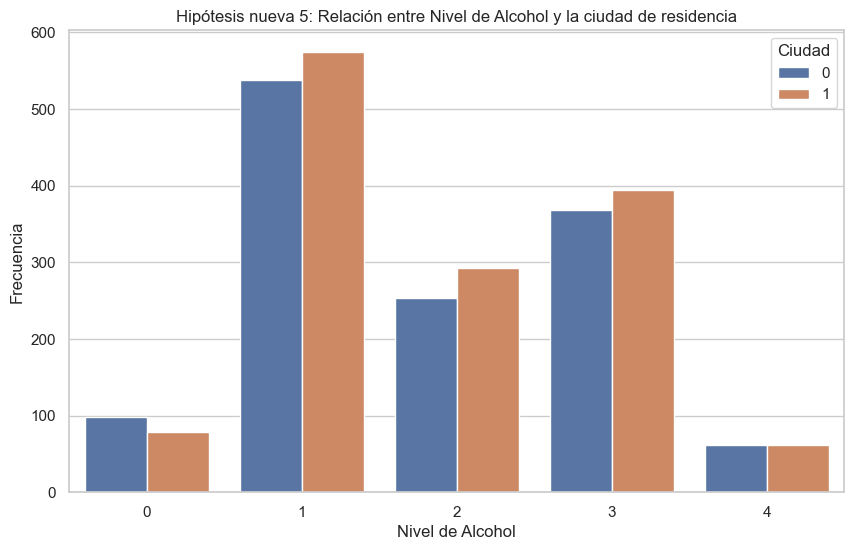

In [72]:
print("5: Relación entre Nivel de Alcohol y la ciudad de residencia")
tabla_contingencia = pd.crosstab(data_frame['nivelalco'], data_frame['ciudad'])
chi2, p, _, _ = stats.chi2_contingency(tabla_contingencia)

print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
alpha = 0.05
if p < alpha:
    print("Hay una relación significativa entre las dos variables categóricas.")
else:
    print("No hay evidencia de una relación significativa entre las dos variables categóricas.")


#grafico de barras para las 2 variables
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data_frame, x='nivelalco', hue='ciudad')
plt.xlabel('Nivel de Alcohol')
plt.ylabel('Frecuencia')
plt.title('Hipótesis nueva 5: Relación entre Nivel de Alcohol y la ciudad de residencia')
plt.legend(title='Ciudad', loc='upper right')
plt.show()

HIPOTESIS 6

6: Relación entre Nivel de Alcohol y el género
Estadístico Chi-cuadrado: 7.444448226840919
Valor p: 0.11418398656252175
No hay evidencia de una relación significativa entre las dos variables categóricas.


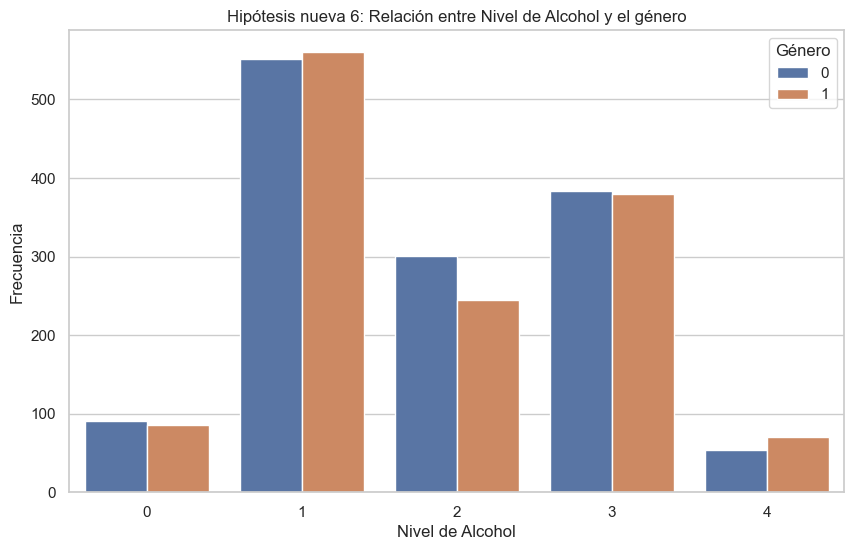

In [73]:
print("6: Relación entre Nivel de Alcohol y el género")
tabla_contingencia = pd.crosstab(data_frame['nivelalco'], data_frame['genero'])
chi2, p, _, _ = stats.chi2_contingency(tabla_contingencia)

print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
alpha = 0.05
if p < alpha:
    print("Hay una relación significativa entre las dos variables categóricas.")
else:
    print("No hay evidencia de una relación significativa entre las dos variables categóricas.")


#grafico de barras para las 2 variables
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data_frame, x='nivelalco', hue='genero')
plt.xlabel('Nivel de Alcohol')
plt.ylabel('Frecuencia')
plt.title('Hipótesis nueva 6: Relación entre Nivel de Alcohol y el género')
plt.legend(title='Género', loc='upper right')
plt.show()


HIPOTESIS 7

7: Relación entre Nivel de Alcohol y el estado parental
Estadístico Chi-cuadrado: 1.3275477743450628
Valor p: 0.8566846145709689
No hay evidencia de una relación significativa entre las dos variables categóricas.


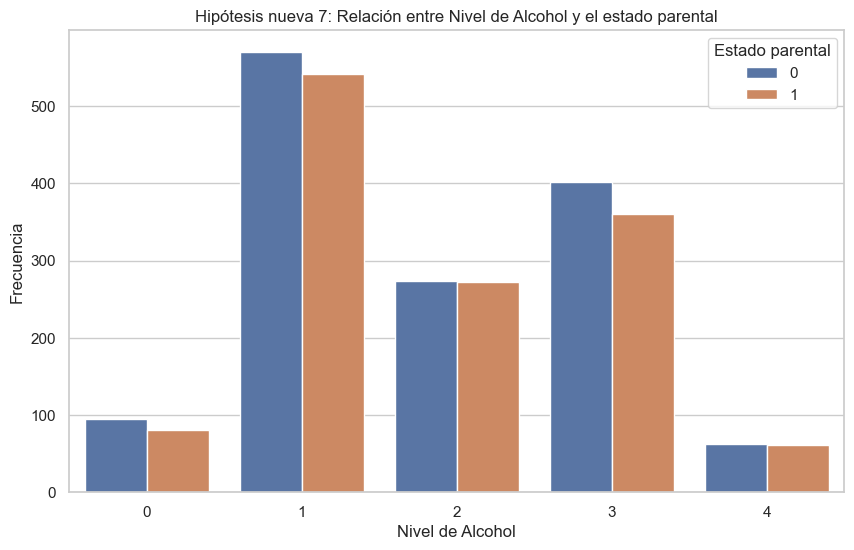

In [74]:
print("7: Relación entre Nivel de Alcohol y el estado parental")
tabla_contingencia = pd.crosstab(data_frame['nivelalco'], data_frame['estadoP'])
chi2, p, _, _ = stats.chi2_contingency(tabla_contingencia)

print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
alpha = 0.05
if p < alpha:
    print("Hay una relación significativa entre las dos variables categóricas.")
else:
    print("No hay evidencia de una relación significativa entre las dos variables categóricas.")


#grafico de barras para las 2 variables
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data_frame, x='nivelalco', hue='estadoP')
plt.xlabel('Nivel de Alcohol')
plt.ylabel('Frecuencia')
plt.title('Hipótesis nueva 7: Relación entre Nivel de Alcohol y el estado parental')
plt.legend(title='Estado parental', loc='upper right')
plt.show()

MODELO PREDICTIVO

In [75]:
#normalizacion
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Selecciona las columnas que deseas normalizar (excluyendo la columna 'nivelalco')
columnas_a_normalizar = data_frame.columns.difference(['nivelalco'])

# Aplica la normalización a las columnas seleccionadas
data_frame[columnas_a_normalizar] = scaler.fit_transform(data_frame[columnas_a_normalizar])


#division del dataset
data_frame["Prediccion"]=0
#desordenar el dataset con una semilla =7
data_frame = data_frame.sample(frac=1, random_state=7)
#determinar cantidad de filas para dejar el 65% como entrenamiento y el resto como prueba
cantidad_total_filas = len(data_frame)
cantidad_entrenamiento = int(0.65 * cantidad_total_filas)
conjunto_entrenamiento = data_frame.iloc[:cantidad_entrenamiento]
conjunto_prueba = data_frame.iloc[cantidad_entrenamiento:]
#holgura definida para que se encuentre un promedio cercano en el modelo ya que es difil que sea uno exacto
holgura_promedio=0.1
#reseteo de indices para su posterior comparacion
conjunto_prueba_reset = conjunto_prueba.reset_index(drop=True)
conjunto_entrenamiento_reset = conjunto_entrenamiento.reset_index(drop=True)

In [86]:
def consultar_similitudes(resultado):
    if len(resultado)==1:
        return (resultado["nivelalco"].values)
    elif len(resultado)>1:
        frecuencia_nivelalco = resultado['nivelalco'].value_counts()
        nivelalco_mas_frecuente = frecuencia_nivelalco.idxmax()
        return nivelalco_mas_frecuente

for index, fila in conjunto_prueba_reset.iterrows():
    filtro1=(conjunto_entrenamiento_reset['razon'] == fila["razon"])
    filtro2= (conjunto_entrenamiento_reset['Promedio'] >= (fila["Promedio"] - holgura_promedio)) & (conjunto_entrenamiento_reset['Promedio'] <= (fila["Promedio"] + holgura_promedio))
    filtro3=(conjunto_entrenamiento_reset['salud'] == fila["salud"])
    filtro4=(conjunto_entrenamiento_reset['pololea'] == fila["pololea"])
    condiciones = filtro1 & \
                filtro2 & \
                filtro3 & \
                filtro4 

    resultado_filtrado = conjunto_entrenamiento_reset[condiciones]
    if len(resultado_filtrado)>=1:
        conjunto_prueba_reset.at[index, 'Prediccion'] = consultar_similitudes(resultado_filtrado)
    else:
        if not conjunto_entrenamiento_reset[filtro1 & filtro2 & filtro3].empty:

            resultado_filtrado = conjunto_entrenamiento_reset[filtro1 & filtro2 & filtro3]
            conjunto_prueba_reset.at[index, 'Prediccion'] = consultar_similitudes(resultado_filtrado)

        elif  not conjunto_entrenamiento_reset[filtro1 & filtro3 & filtro4].empty:

            resultado_filtrado = conjunto_entrenamiento_reset[filtro1 & filtro4 & filtro3]
            conjunto_prueba_reset.at[index, 'Prediccion'] = consultar_similitudes(resultado_filtrado)

        elif  not conjunto_entrenamiento_reset[filtro2 & filtro3 & filtro4].empty:

            resultado_filtrado = conjunto_entrenamiento_reset[filtro1 & filtro3 & filtro4]
            conjunto_prueba_reset.at[index, 'Prediccion'] = consultar_similitudes(resultado_filtrado)

        elif  not conjunto_entrenamiento_reset[filtro1 & filtro2].empty:

            resultado_filtrado = conjunto_entrenamiento_reset[filtro1 & filtro2 ]
            conjunto_prueba_reset.at[index, 'Prediccion'] = consultar_similitudes(resultado_filtrado)

        elif  not conjunto_entrenamiento_reset[filtro1 & filtro3].empty:
            
            resultado_filtrado = conjunto_entrenamiento_reset[filtro1 & filtro3]
            conjunto_prueba_reset.at[index, 'Prediccion'] = consultar_similitudes(resultado_filtrado)

        elif  not conjunto_entrenamiento_reset[filtro1 & filtro4].empty:

            resultado_filtrado = conjunto_entrenamiento_reset[filtro1 & filtro4 ]
            conjunto_prueba_reset.at[index, 'Prediccion'] = consultar_similitudes(resultado_filtrado)
Prediccion=[0,0,0,0,0]
PrediccionF=[0,0,0,0,0]
suma_aciertos=0
suma_fallas=0
for i in range(5):
    conteo = len(conjunto_prueba_reset[(conjunto_prueba_reset['nivelalco'] == i) & (conjunto_prueba_reset['Prediccion'] == i)])
    Prediccion[i]=conteo/len(conjunto_prueba_reset[(conjunto_prueba_reset['nivelalco'] == i)])
    suma_aciertos+=conteo

    conteoF = len(conjunto_prueba_reset[(conjunto_prueba_reset['nivelalco'] != i) & (conjunto_prueba_reset['Prediccion'] == i)])
    PrediccionF[i]=conteoF/len(conjunto_prueba_reset[(conjunto_prueba_reset['Prediccion'] == i)])
    suma_fallas+=conteoF


print("-"*50)
print("\t")
for key,valor in mapeo.items():
    print("Los aciertos de la categoria ", key," son de ",Prediccion[valor])

print("-"*50)
print("\t")
for key,valor in mapeo.items():
    print("Los fallos de la categoria ", key," son de ",PrediccionF[valor])
print("-"*50)
print("\t")

print("la tasa de aciertos para los datos de Prueba ", suma_aciertos/len(conjunto_prueba_reset)*100,"%")
print("la tasa de fallas para los datos de Prueba ", suma_fallas/len(conjunto_prueba_reset)*100,"%")

--------------------------------------------------
	
Los aciertos de la categoria  MUYBAJO  son de  0.0
Los aciertos de la categoria  BAJO  son de  0.6556122448979592
Los aciertos de la categoria  NORMAL  son de  0.10396039603960396
Los aciertos de la categoria  ALTO  son de  0.6573705179282868
Los aciertos de la categoria  MUYALTO  son de  0.0
--------------------------------------------------
	
Los fallos de la categoria  MUYBAJO  son de  1.0
Los fallos de la categoria  BAJO  son de  0.4940944881889764
Los fallos de la categoria  NORMAL  son de  0.6865671641791045
Los fallos de la categoria  ALTO  son de  0.5429362880886427
Los fallos de la categoria  MUYALTO  son de  1.0
--------------------------------------------------
	
la tasa de aciertos para los datos de Prueba  46.53361344537815 %
la tasa de fallas para los datos de Prueba  53.46638655462185 %
